# Digit Recognizer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch, torchvision
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/psumit/.virtualenvs/venv_digit_recognizer/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/psumit/.virtualenvs/venv_digit_recognizer/lib/python

In [4]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
sample = pd.read_csv('dataset/sample_submission.csv')

In [26]:
train_numpy = train.to_numpy()

# the image var is for understanding purpose only
image = train_numpy[3, 1:] # 3rd row, was 4 in the csv

(28, 28) <class 'tuple'>


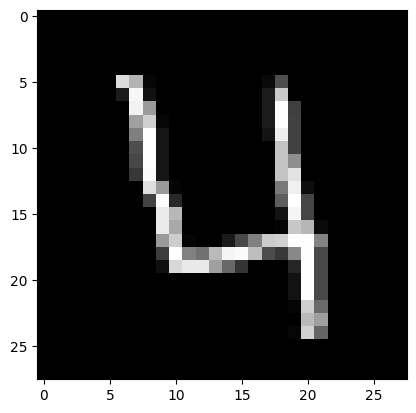

In [30]:
reshaped_image = image.reshape(28, 28)
plt.imshow(reshaped_image, cmap='gray')

print(reshaped_image.shape, type(reshaped_image.shape))

### Let's plan

For the neural network, let's do it as:
784 -> 128 -> 64 -> 10

784 are the pixels of the image, 128 and 64 are the number of neurons in the hidden layers and 10 is the number of classes. 

We will use the ReLU activation function for the hidden layers and the softmax activation function for the output layer.

i.e., ReLU for 128 and 64 neurons and softmax for 10 neurons.

ReLU formula is:

$relu(x) = max(0, x)$

Softmax formula is:

$softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

But how will we verify the prediction with the real MNIST dataset? We will use the cross-entropy loss function. And? We will use the gradient descent optimizer to minimize the loss function. How will we show the output of the model? We will use the accuracy metric. 

Format of the result should be like this:

```
ImageId,Label
1,0
2,0
3,0
etc.
```

In [32]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_train = train_numpy[:, 1:] # all rows, all columns except the first
Y_train = train_numpy[:, 0] # all rows, only the first column

print(f"X_train\'s shape: {X_train.shape}\nY_train\'s shape: {Y_train.shape}")

X_train's shape: (42000, 784)
Y_train's shape: (42000,)


This basically means X_train has 42000 rows and 784 columns (pixel0 to pixel783). And Y_train has 42000 elements. When the shape is written as (42000,), the absence of a second dimension after the comma means it’s just a single vector (a 1D array), not a 2D array like X_train.

In [37]:
X_train = X_train / 255.0
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])